# Importar librerias necesarias y diccionario de variables

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import numpy as np 
import seaborn as sns 
import requests
import json

## Diccionario de variables
- customerID: número de identificación único de cada cliente
- Churn: si el cliente dejó o no la empresa
- gender: género (masculino y femenino)
- SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- Partner: si el cliente tiene o no una pareja
- Dependents: si el cliente tiene o no dependientes
- tenure: meses de contrato del cliente
- PhoneService: suscripción al servicio telefónico 
- MultipleLines: suscripción a más de una línea telefónica
- InternetService: suscripción a un proveedor de internet (tipo)
- OnlineSecurity: suscripción adicional de seguridad en línea
- OnlineBackup: suscripción adicional de respaldo en línea
- DeviceProtection: suscripción adicional de protección del dispositivo
- TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera
- StreamingTV: suscripción de televisión por cable
- StreamingMovies: suscripción de streaming de películas
- Contract: tipo de contrato
- PaperlessBilling: si el cliente prefiere recibir la factura en línea
- PaymentMethod: forma de pago
- Charges.Monthly: total de todos los servicios del cliente por mes
- Charges.Total: total gastado por el cliente

# Leer los datos 

In [3]:
datos = requests.get('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
resultado = json.loads(datos.text)
df = pd.DataFrame(resultado)

In [4]:
customer_df = pd.json_normalize(df['customer'])
phone_df    = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df  = pd.json_normalize(df['account'])

# Ahora concatenamos todo con las columnas originales que ya estaban planas
df = pd.concat(
    [df[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df],
    axis=1
)

In [5]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# Analisis exploratorio de datos 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

# Limpieza de datos 

## Datos nulos 

In [8]:
df['Charges.Total'].value_counts()
df['Charges.Total'] = df['Charges.Total'].replace(['', ' '], pd.NA)
df = df.dropna(subset=['Charges.Total']).copy()
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df = df.dropna(subset=['Charges.Total'])
df['Charges.Total'].isna().sum()

np.int64(0)

In [9]:
df['Churn'].value_counts()
df['Churn'] = df['Churn'].replace('', pd.NA).replace(' ', pd.NA)
df = df.dropna(subset=['Churn'])
df['Churn'].value_counts()


Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [10]:
df.isna().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

## Cambiar el tipo de datos al apropiado

In [11]:
columnas_str = ['SeniorCitizen']
columnas_float = ['Charges.Total']
df[columnas_str] = df[columnas_str].astype(str)
df[columnas_float] = df[columnas_float].astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 
 17  

## Reemplazar valor por fines de clariadad y accessibilidad 

In [13]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

In [14]:
df['SeniorCitizen'] = df['SeniorCitizen'].replace("1", "Si").replace("0","No")
col_yes_no = ['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
              'InternetService', 'OnlineBackup','OnlineSecurity', 'DeviceProtection','TechSupport', 'StreamingTV',
              'StreamingMovies', 'PaperlessBilling']
for col in df[col_yes_no]:
    df[col] = df[col].replace('Yes','Si')

df['gender'] = df['gender'].replace("Female", "Mujer").replace("Male", "Hombre")
df['InternetService'] = df['InternetService'].replace('Fiber optic','Fibra Optica')

In [15]:
df[col_yes_no].value_counts()

Churn  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines     InternetService  OnlineBackup         OnlineSecurity       DeviceProtection     TechSupport          StreamingTV          StreamingMovies      PaperlessBilling
No     No             No       No          Si            No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  No                  348
                      Si       Si          Si            No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  No                  271
                      No       No          Si            No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Si                  139
                      Si       No      

## Creación de columna de cuentas diarias

In [16]:
df['Cuentas_diarias'] = (df['Charges.Monthly']/30).round(2)

In [17]:
df.columns.tolist()

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total',
 'Cuentas_diarias']

In [18]:
col_order = ['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Cuentas_diarias',
 'Charges.Monthly',
 'Charges.Total']


df = df[col_order]

In [19]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cuentas_diarias,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Mujer,No,Si,Si,9,Si,No,DSL,...,No,Si,Si,No,One year,Si,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,No,Hombre,No,No,No,9,Si,Si,DSL,...,No,No,No,Si,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,Si,Hombre,No,No,No,4,Si,No,Fibra Optica,...,Si,No,No,No,Month-to-month,Si,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,Si,Hombre,Si,Si,No,13,Si,No,Fibra Optica,...,Si,No,Si,Si,Month-to-month,Si,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,Si,Mujer,Si,Si,No,3,Si,No,Fibra Optica,...,No,Si,Si,No,Month-to-month,Si,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Mujer,No,No,No,13,Si,No,DSL,...,No,Si,No,No,One year,No,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,Si,Hombre,No,Si,No,22,Si,Si,Fibra Optica,...,No,No,No,Si,Month-to-month,Si,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Hombre,No,No,No,2,Si,No,DSL,...,No,No,No,No,Month-to-month,Si,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,No,Hombre,No,Si,Si,67,Si,No,DSL,...,Si,Si,No,Si,Two year,No,Mailed check,2.26,67.85,4627.65


In [20]:
df.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,2.159891,64.798208,2283.300441
std,24.545260,1.002955,30.085974,2266.771362
min,1.000000,0.610000,18.250000,18.800000
25%,9.000000,1.187500,35.587500,401.450000
50%,29.000000,2.340000,70.350000,1397.475000
75%,55.000000,2.992500,89.862500,3794.737500
max,72.000000,3.960000,118.750000,8684.800000


# Analisis de datos

## Distribución de empleados que se mantuvieron en el servicio y los que se fueron

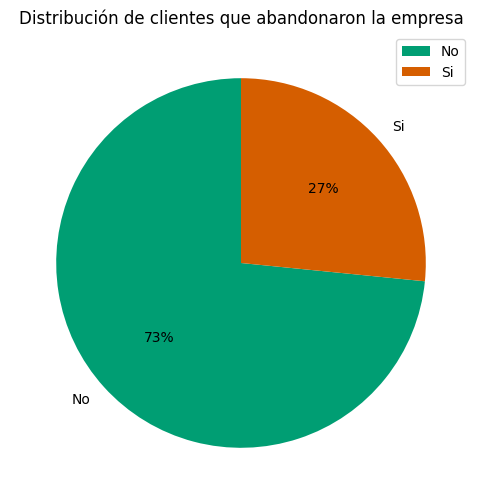

In [21]:
colors_pie = {'Si': '#D55E00',
              'No': '#009E73'}
fig, ax = plt.subplots(figsize=(16, 6))
counts = df['Churn'].value_counts()
colors = [colors_pie[label] for label in counts.index]
wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.0f%%', startangle=90, colors=colors)
ax.set_title('Distribución de clientes que abandonaron la empresa')
ax.legend(wedges, counts.index, loc='upper right')
plt.show()

Podemos observar que la gran mayoría de los clientes se no han abandonado la empresa, aunque la empresa tiene un porcentaje considerable de clientes que han abandonado el servicio (cerca del 30%). Con el fin de entender mejor las caussas de la desuscripción, es importante analizar las características de los clientes que se han ido en comparación con los que se han quedado.

### Creación de dataframes separados por churn

In [22]:
# Dejo la empresa 
df_churn_yes = df[df['Churn'] == 'Si']

#Se quedo en la empresa 
df_churn_no = df[df['Churn'] == 'No']

### Estadísticas descripitivas de variables numéricas de clientes que se fueron

In [23]:
df_churn_yes.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,2.481450,74.441332,1531.796094
std,19.531123,0.822287,24.666053,1890.822994
min,1.000000,0.630000,18.850000,18.850000
25%,2.000000,1.870000,56.150000,134.500000
50%,10.000000,2.660000,79.650000,703.550000
75%,29.000000,3.140000,94.200000,2331.300000
max,72.000000,3.940000,118.350000,8684.800000


In [24]:
df_churn_no.describe()

,tenure,Cuentas_diarias,Charges.Monthly,Charges.Total
count,5163.00000,5163.000000,5163.000000,5163.000000
mean,37.65001,2.043486,61.307408,2555.344141
std,24.07694,1.036560,31.094557,2329.456984
min,1.00000,0.610000,18.250000,18.800000
25%,15.00000,0.840000,25.100000,577.825000
50%,38.00000,2.150000,64.450000,1683.600000
75%,61.00000,2.950000,88.475000,4264.125000
max,72.00000,3.960000,118.750000,8672.450000


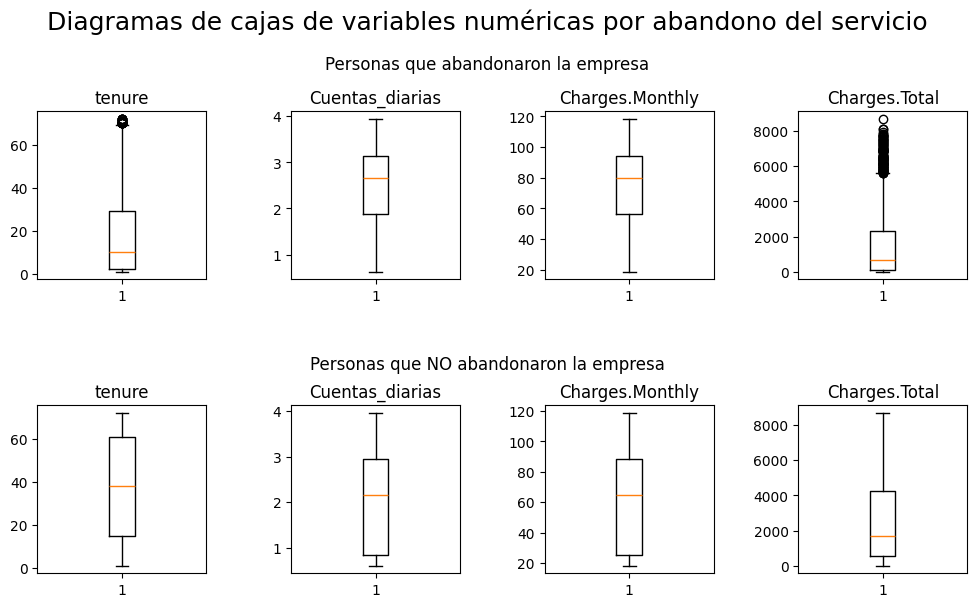

In [25]:
fig, axs = plt.subplots(2,4, figsize = (12,6))
fig.subplots_adjust(hspace= 0.75, wspace=0.5)
fig.suptitle('Diagramas de cajas de variables numéricas por abandono del servicio', fontsize=18, y= 1.05)
fig.text(0.5, 0.95, 'Personas que abandonaron la empresa', ha='center', fontsize=12)
fig.text(0.5, 0.45, 'Personas que NO abandonaron la empresa', ha='center', fontsize=12)

variables = ['tenure','Cuentas_diarias', 'Charges.Monthly','Charges.Total']

for i, var in enumerate(variables):
    axs[0, i].boxplot(df_churn_yes[var])
    axs[0, i].set_title(var)
    
    axs[1, i].boxplot(df_churn_no[var])
    axs[1, i].set_title(var)

plt.show()

Al analizar las estadísticas descriptivas de los clientes que se fueron en comparación con los que se han mantenido en el servicio, podemos identificar que los clientes que se fueron en promedio tienen una duracion del contrato menor en comparción con los que se han mantenido, lo cual es relativamente lógico. Al revisar el promeido de cobro mensual y diarios, podemos observar que los clientes que se han ido tienen en promedio mayores cobros mensuales y diarios, aunque el total de cobro si es mayor en los clientes que se han mantenido pero esto se puede explicar por la mayor duración del contrato. De igual forma es importante resaltar que el 75% de los clientes que se han ido tienen un cobre mensual y diario mayor a los que se han mantenido. La cantidad de cobro se puede explicar por los servicios contratados por lo tanto es importante analizar los servicios contratados por los clientes que se han ido y los que se han mantenido para entender mejor las causas de la desuscripción.

### Distribución de género

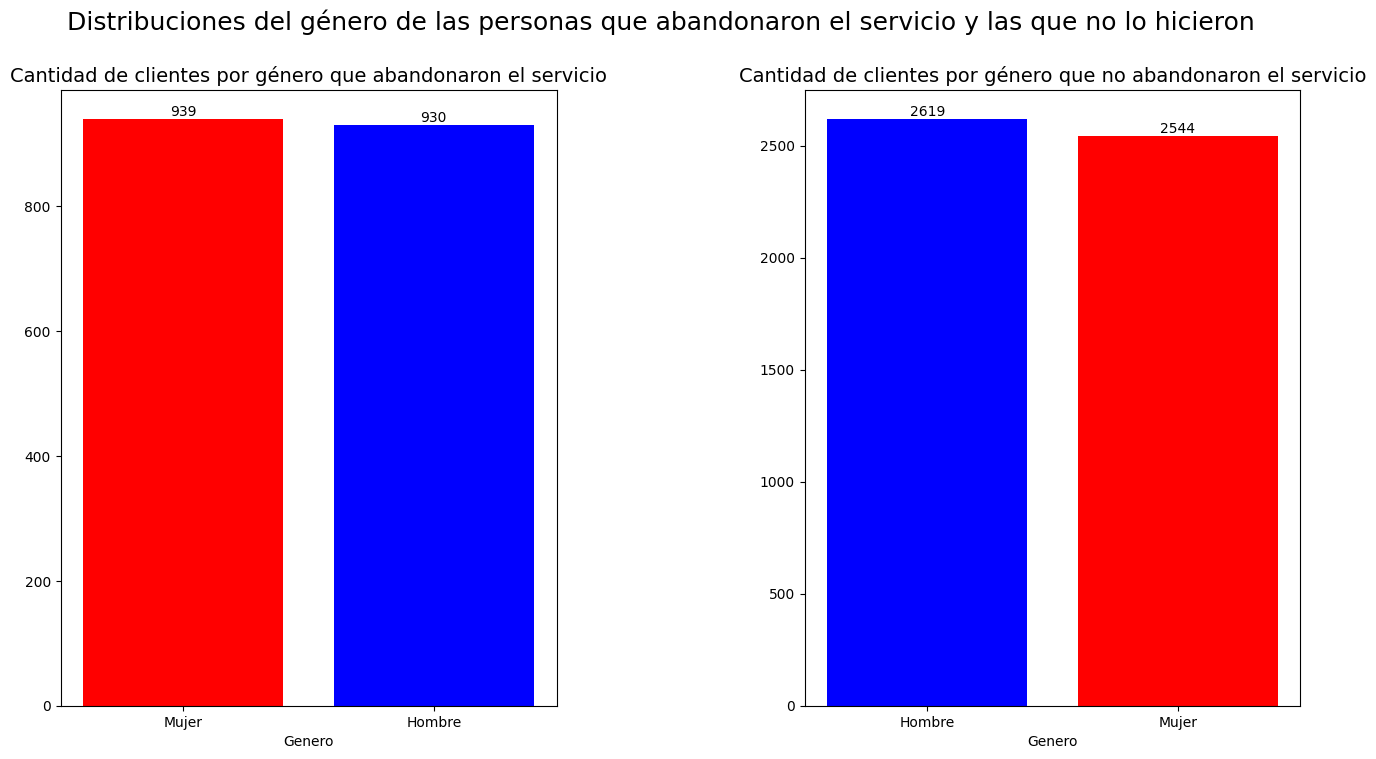

In [26]:
fig, axs = plt.subplots(1,2,figsize=(16, 8))
fig.suptitle('Distribuciones del género de las personas que abandonaron el servicio y las que no lo hicieron', fontsize = 18)
fig.subplots_adjust(wspace=0.5)
gender_colors = {"Mujer": "red", "Hombre": "blue"}


gender_counts_yes = df_churn_yes['gender'].value_counts()
gender_counts_no = df_churn_no['gender'].value_counts()

colors_gender_yes = [gender_colors[label] for label in gender_counts_yes.index]
colors_gender_no = [gender_colors[label] for label in gender_counts_no.index]

colors_gender = [gender_colors[label] for label in gender_counts_yes.index]
axs[0].bar(gender_counts_yes.index, gender_counts_yes.values, color = colors_gender_yes)
for i, j in enumerate(gender_counts_yes.values):
    axs[0].text(i, j, str(j), color='black', fontsize=10, ha='center', va='bottom')

axs[0].set_xlabel('Genero')
axs[0].set_title('Cantidad de clientes por género que abandonaron el servicio',fontsize = 14)

axs[1].bar(gender_counts_no.index, gender_counts_no.values, color = colors_gender_no)
for i, j in enumerate(gender_counts_no.values):
    axs[1].text(i, j, str(j), color='black', fontsize=10, ha='center', va='bottom')

axs[1].set_xlabel('Genero')
axs[1].set_title('Cantidad de clientes por género que no abandonaron el servicio', fontsize = 14)

plt.show()

Podemos observar que no hay mucha diferencia en terminos del género de los clientes que han abandonado el servicio, debido a que las distribuciones son bastante equilibradas entre hombres y mujeres. Por lo tanto, podemos concluir que el género no es un factor determinante en la decisión de abandonar el servicio. 

### Datos demograficos de los clientes que abandonaron el servicio contra los que no abandonaron el servicio (senior citizen, partner, dependents)

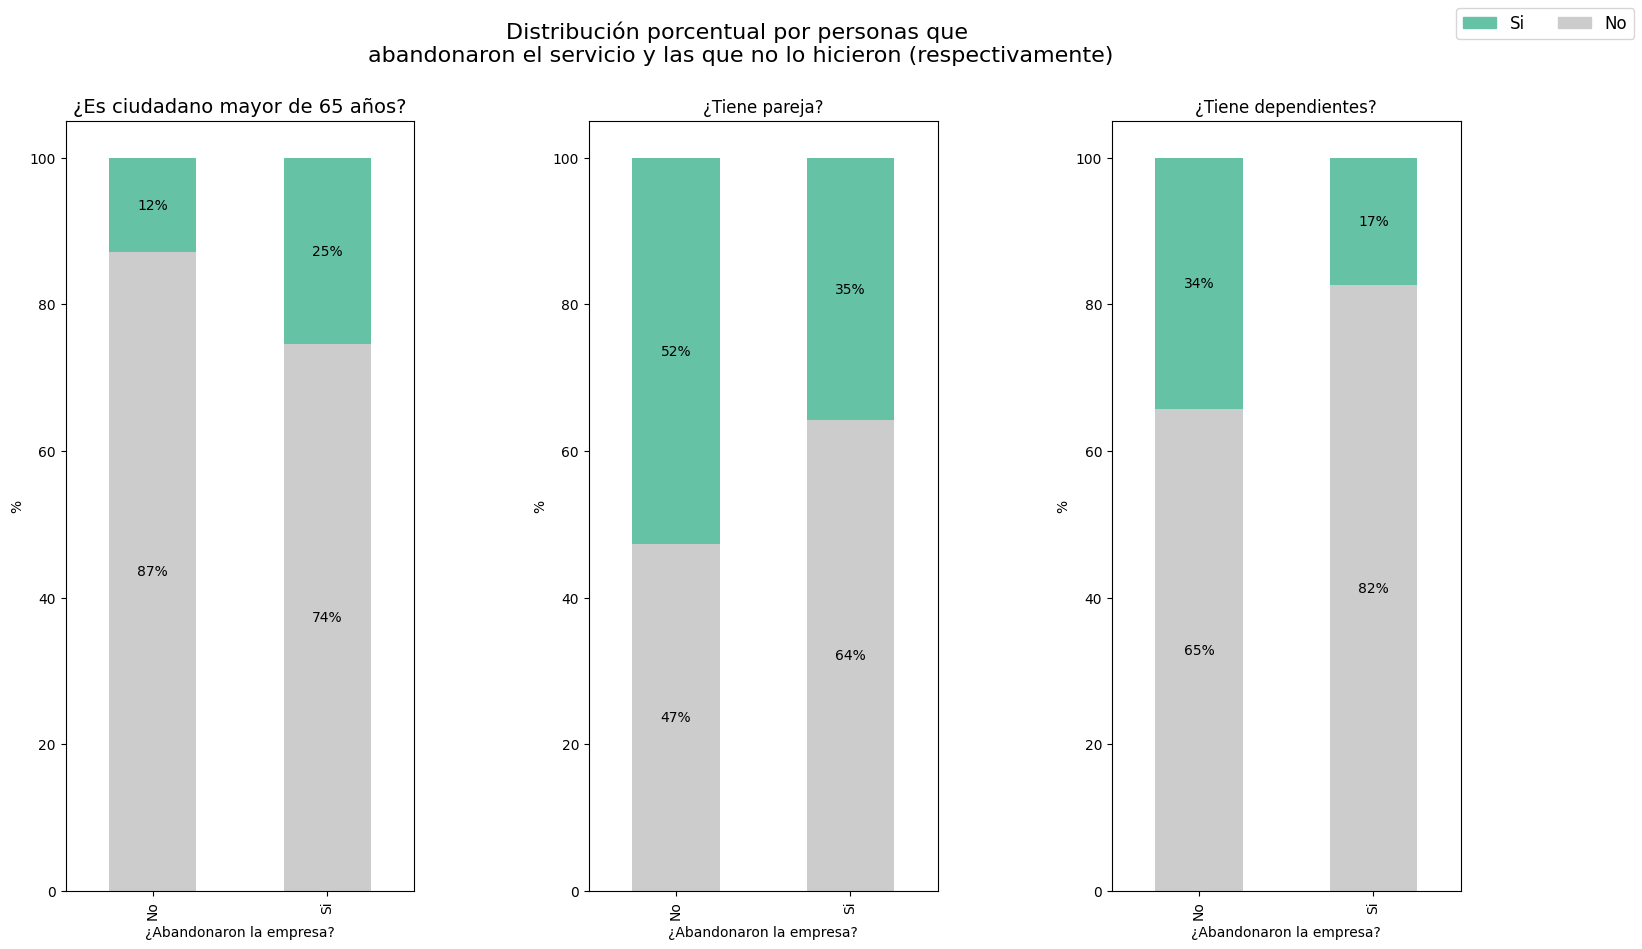

In [27]:
def get_stacked_percentage(var):
    counts = df.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages


def add_labels(ax, df):
    for i, row in enumerate(df.values):
        cumulative = 0
        for j, val in enumerate(row):
            if val > 0:
                label = f"{int(val)}%"  
                ax.text(i, cumulative + val / 2, label, ha='center', va='center', fontsize=10)
                cumulative += val

senior_pct = get_stacked_percentage('SeniorCitizen')
partner_pct = get_stacked_percentage('Partner')
dependents_pct = get_stacked_percentage('Dependents')
phone_service_pct = get_stacked_percentage('PhoneService')
internt_service_pct = get_stacked_percentage('InternetService')

color_dicts_yes_no = {
    'Categorical_Yes_No': {'Si': '#66C2A5', 'No': '#CCCCCC'},}

fig, axs = plt.subplots(1, 3, figsize=(18, 10))
fig.suptitle('Distribución porcentual por personas que \nabandonaron el servicio y las que no lo hicieron (respectivamente)', fontsize=16)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

fig.subplots_adjust(wspace=0.5, hspace= 1)


senior_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in senior_pct.columns], legend= False)
axs[0].set_title('¿Es ciudadano mayor de 65 años?', fontsize = 14)
axs[0].set_ylabel('%', fontsize = 10)
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], senior_pct)

partner_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in partner_pct.columns], legend= False)
axs[1].set_title('¿Tiene pareja?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1],partner_pct)


dependents_pct.plot(kind='bar', stacked=True, ax=axs[2], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in dependents_pct.columns], legend= False)
axs[2].set_title('¿Tiene dependientes?')
axs[2].set_ylabel('%')
axs[2].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[2],dependents_pct)

plt.show()


Al analizar los datos demográficos de los clientes que han abandonado el servicio en comparación con los que no lo han hecho, podemos identificar diferentes patrones que pueden ayudar a entender las razones detrás de la desuscripción. En primer lugar, hay un porcentaje mayor de clientes que mayores de 65 años que han abandonado la empresa en comparación con los que no lo han hecho. Esto sugiere que los clientes mayores pueden ser más propensos a abandonar el servicio, lo cual puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes. Aunque es importante tener en cuenta que la diferencia no es muy grande, ya que el 25% que han abandonado el servicio son mayores de 65 años, mientras que el 12% de los que no lo han hecho también lo son.

De igual forma las personas que **no** han abandonado el servicio tienen un porcentaje mayor de personas con pareja y dependientes en comparación con los que han abandonado el servicio. Esto sugiere que los clientes que posiblemente tengan una familia o pareja son menos propensos a abandonar el servicio, lo cual puede ser un factor importante a considerar para la empresa al momento de diseñar estrategias de retención de clientes.

### Analisis de servicios contratados por los clientes que se han ido en comparación con los que se han mantenido

In [28]:
df['PhoneService'].value_counts()

PhoneService
Si    6352
No     680
Name: count, dtype: int64

In [29]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3385
Si                  2967
No phone service     680
Name: count, dtype: int64

In [30]:
df['InternetService'].value_counts()

InternetService
Fibra Optica    3096
DSL             2416
No              1520
Name: count, dtype: int64

In [31]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3087
Si                     2425
No internet service    1520
Name: count, dtype: int64

In [32]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3094
Si                     2418
No internet service    1520
Name: count, dtype: int64

In [33]:
df['TechSupport'].value_counts()

TechSupport
No                     3472
Si                     2040
No internet service    1520
Name: count, dtype: int64

In [34]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2809
Si                     2703
No internet service    1520
Name: count, dtype: int64

In [35]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2781
Si                     2731
No internet service    1520
Name: count, dtype: int64

### Servicios telefonicos

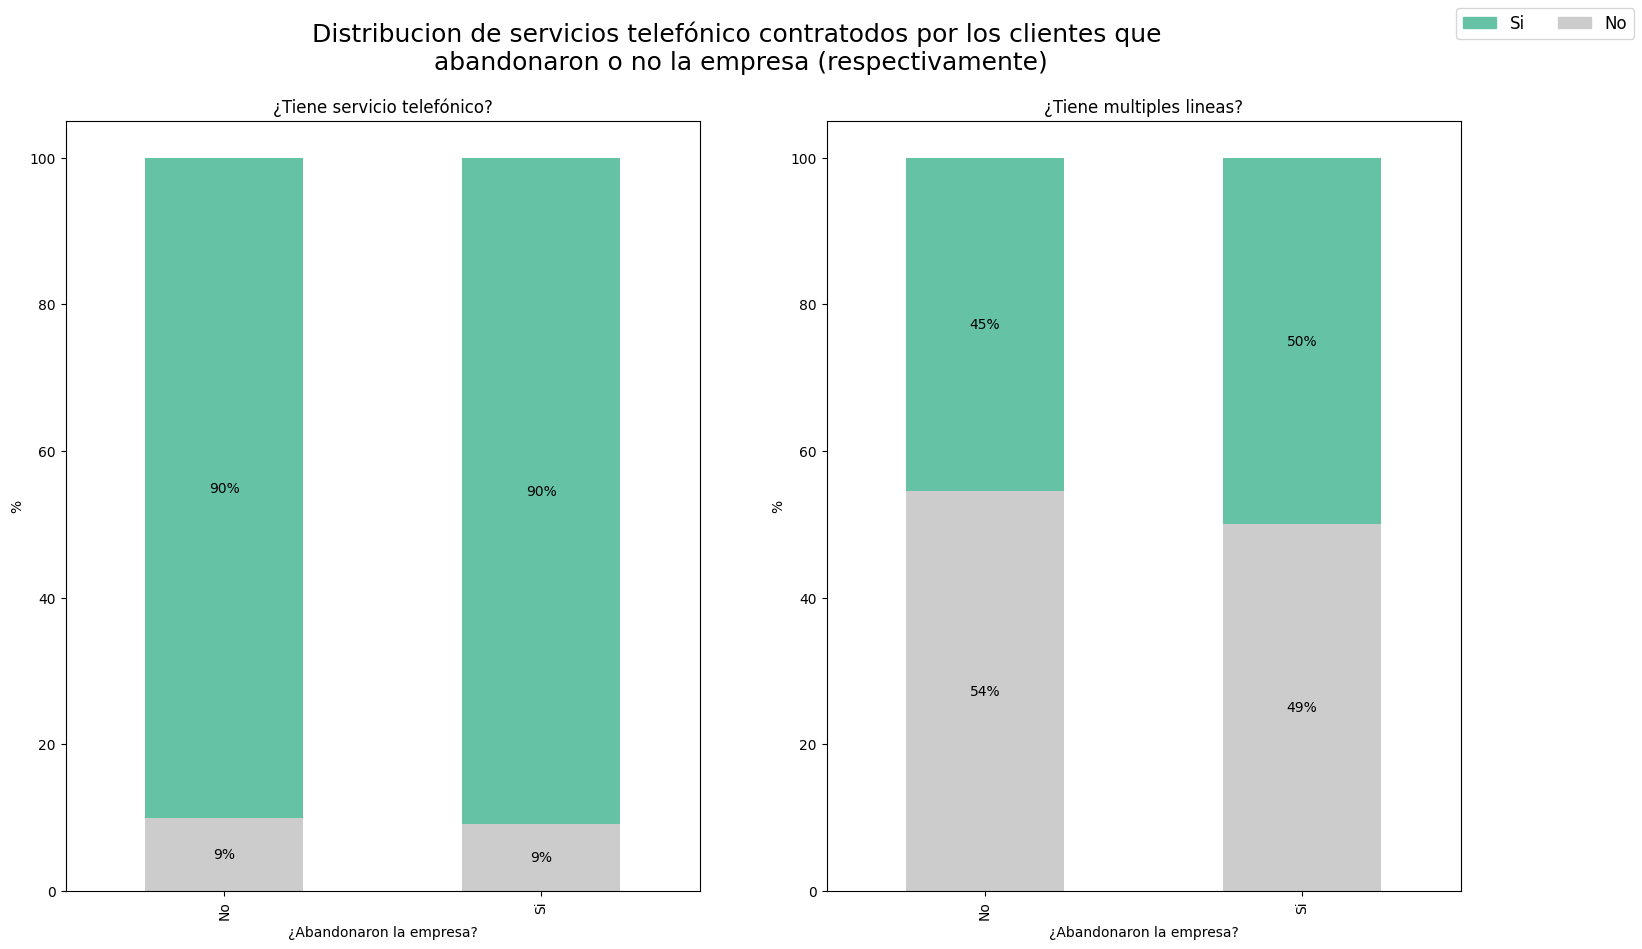

In [36]:
def get_stacked_percentage_multiplelines(var):
    df_multiple_lines = df[df['MultipleLines'] != 'No phone service'].copy()
    counts = df_multiple_lines.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages


phone_service_pct = get_stacked_percentage('PhoneService')
multiplelines_pct = get_stacked_percentage_multiplelines('MultipleLines')


fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribucion de servicios telefónico contratodos por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

phone_service_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in phone_service_pct.columns], legend = False)
axs[0].set_title('¿Tiene servicio telefónico?')
axs[0].set_ylabel('%')
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], phone_service_pct)

multiplelines_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in multiplelines_pct.columns], legend = False)
axs[1].set_title('¿Tiene multiples lineas?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1], multiplelines_pct)

### Servicios de internet

In [37]:
df['InternetService'].value_counts()

InternetService
Fibra Optica    3096
DSL             2416
No              1520
Name: count, dtype: int64

In [38]:
internet_services = ['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df_internet_services_comprobacion = df[df['OnlineBackup'] != 'No internet service'].copy()

In [39]:
df_internet_services_comprobacion['OnlineBackup'].value_counts()

OnlineBackup
No    3087
Si    2425
Name: count, dtype: int64

In [40]:
df_internet_services_comprobacion['OnlineSecurity'].value_counts()

OnlineSecurity
No    3497
Si    2015
Name: count, dtype: int64

In [41]:
df_internet_services_comprobacion['DeviceProtection'].value_counts()

DeviceProtection
No    3094
Si    2418
Name: count, dtype: int64

In [42]:
df_internet_services_comprobacion['TechSupport'].value_counts()

TechSupport
No    3472
Si    2040
Name: count, dtype: int64

In [43]:
df_internet_services_comprobacion['StreamingMovies'].value_counts()

StreamingMovies
No    2781
Si    2731
Name: count, dtype: int64

In [44]:
df_internet_services_comprobacion['StreamingTV'].value_counts()

StreamingTV
No    2809
Si    2703
Name: count, dtype: int64

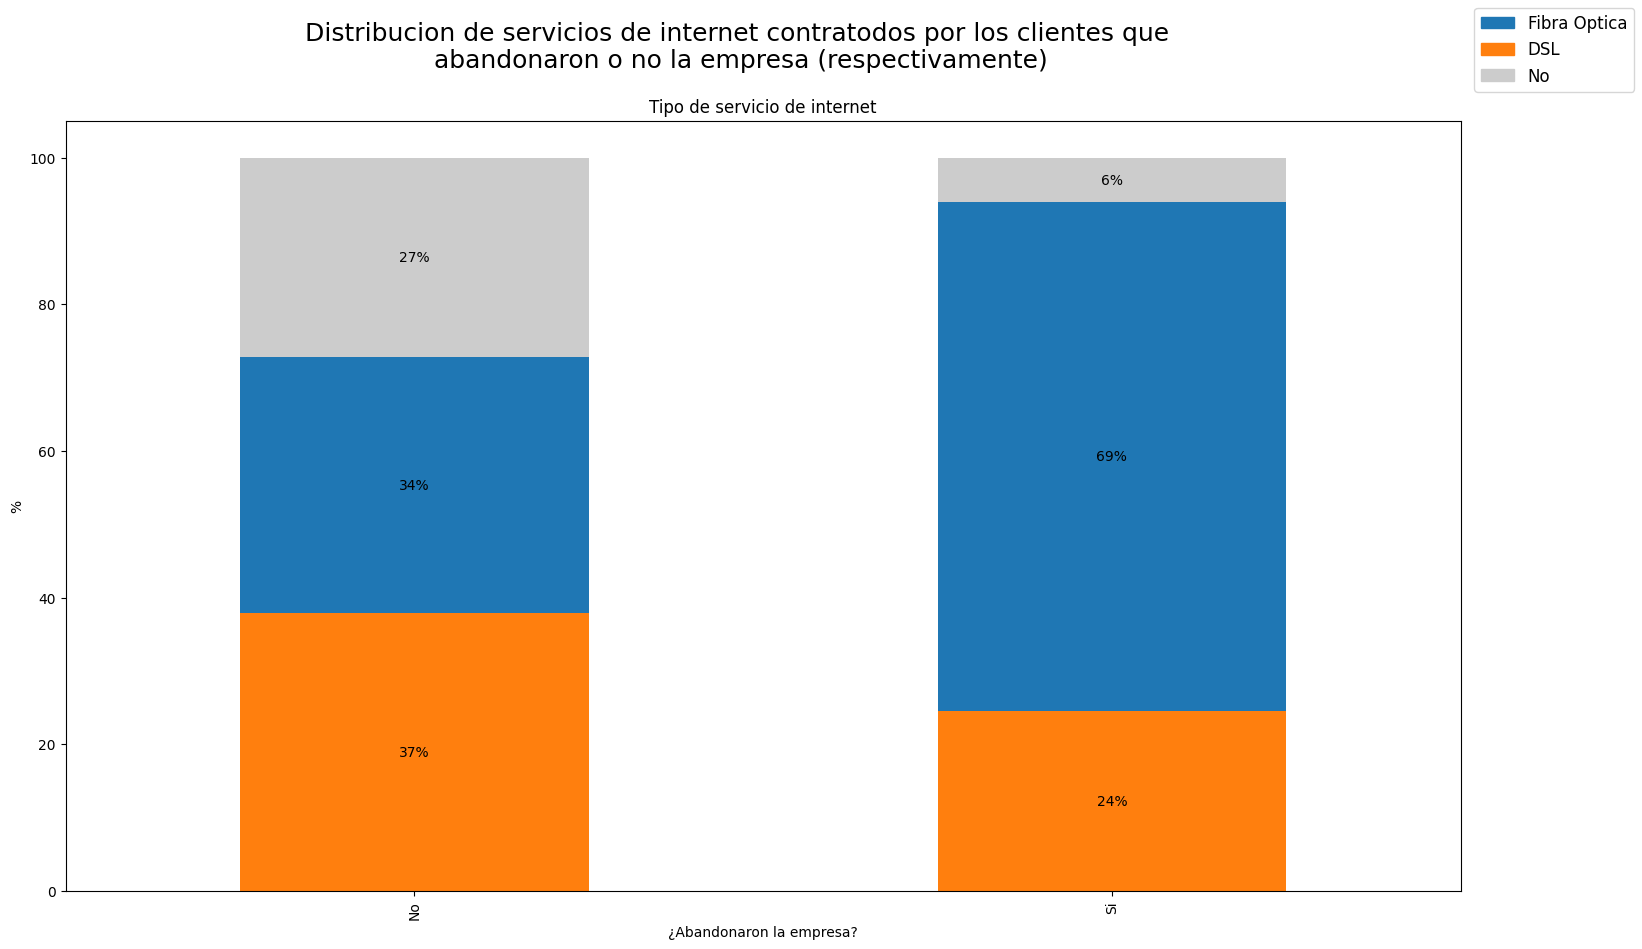

In [45]:
color_dicts_internet_service = {
    'Fibra Optica': '#1f77b4',
    'DSL': '#ff7f0e',
    'No': '#CCCCCC'
}


internet_service_pct = get_stacked_percentage('InternetService')
fig, ax = plt.subplots(figsize=(18, 10))
fig.suptitle('Distribucion de servicios de internet contratodos por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color=color_dicts_internet_service['Fibra Optica'], label='Fibra Optica'),
    mpatches.Patch(color=color_dicts_internet_service['DSL'], label='DSL'),
    mpatches.Patch(color=color_dicts_internet_service['No'], label='No')
]
fig.legend(handles=legend_patches, loc='upper right', ncol=1, fontsize=12)

internet_service_pct.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=[color_dicts_internet_service.get(x, '#999999') for x in internet_service_pct.columns],
    legend=False
)
ax.set_title('Tipo de servicio de internet')
ax.set_ylabel('%')
ax.set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(ax, internet_service_pct)



### Servicios de seguridad, protección y soporte para servicios de internet

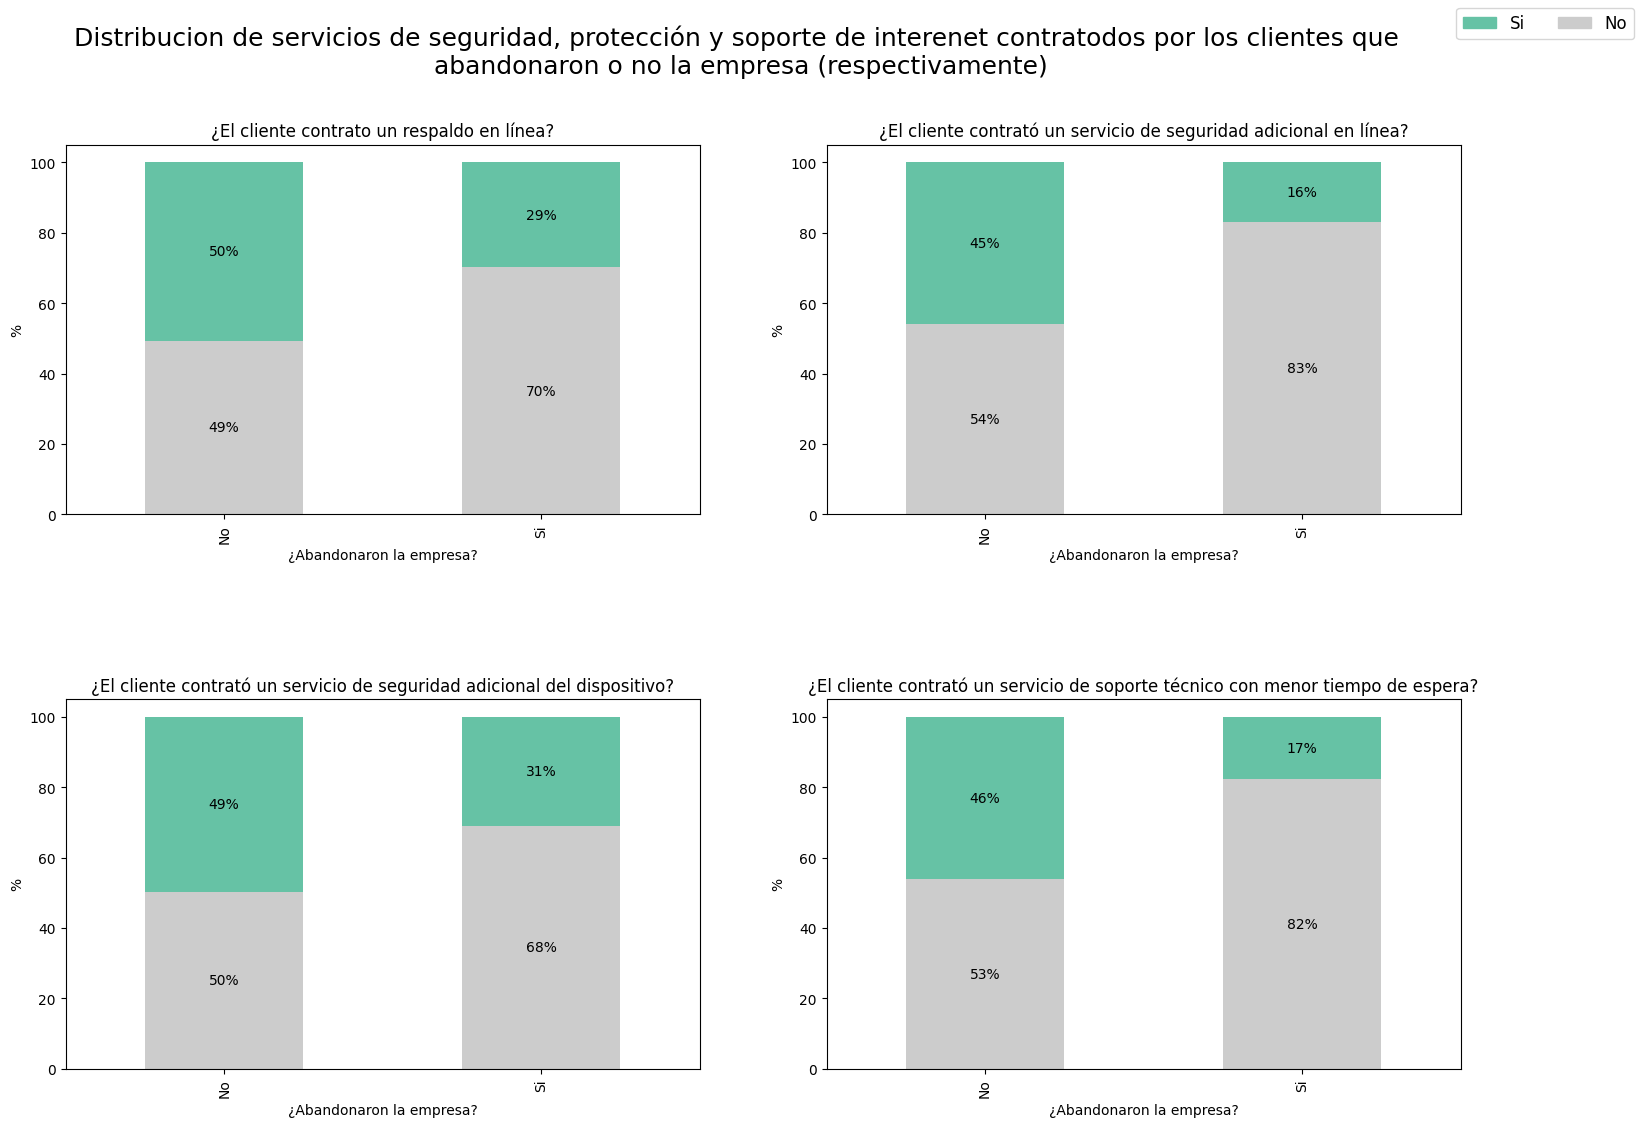

In [48]:
def get_stacked_percentage_internet_services(var):
    # Al quitar el No internet service de una columna se elimina en todas como podemos ver en los value counts de arriba 
    df_internet_services = df[df['OnlineBackup'] != 'No internet service'].copy()
    counts = df_internet_services.groupby(['Churn', var]).size().unstack(fill_value=0)
    percentages = counts.div(counts.sum(axis=1), axis=0) * 100
    return percentages

online_backup_pct = get_stacked_percentage_internet_services('OnlineBackup')
online_security_pct = get_stacked_percentage_internet_services('OnlineSecurity')
device_protection_pct = get_stacked_percentage_internet_services('DeviceProtection')
tech_support_pct = get_stacked_percentage_internet_services('TechSupport')


fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribucion de servicios de seguridad, protección y soporte de interenet contratodos por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

online_backup_pct.plot(kind='bar', stacked=True, ax=axs[0,0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in online_backup_pct.columns], legend = False)
axs[0,0].set_title('¿El cliente contrato un respaldo en línea?')
axs[0,0].set_ylabel('%')
axs[0,0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0,0], online_backup_pct)

online_security_pct.plot(kind='bar', stacked=True, ax=axs[0,1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in online_security_pct.columns], legend = False)
axs[0,1].set_title('¿El cliente contrató un servicio de seguridad adicional en línea?')
axs[0,1].set_ylabel('%')
axs[0,1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0,1], online_security_pct)

device_protection_pct.plot(kind='bar', stacked=True, ax=axs[1,0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in device_protection_pct.columns], legend = False)
axs[1,0].set_title('¿El cliente contrató un servicio de seguridad adicional del dispositivo?')
axs[1,0].set_ylabel('%')
axs[1,0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1,0], device_protection_pct)

tech_support_pct.plot(kind='bar', stacked=True, ax=axs[1,1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in tech_support_pct.columns], legend = False)
axs[1,1].set_title('¿El cliente contrató un servicio de soporte técnico con menor tiempo de espera?')
axs[1,1].set_ylabel('%')
axs[1,1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1,1], tech_support_pct)

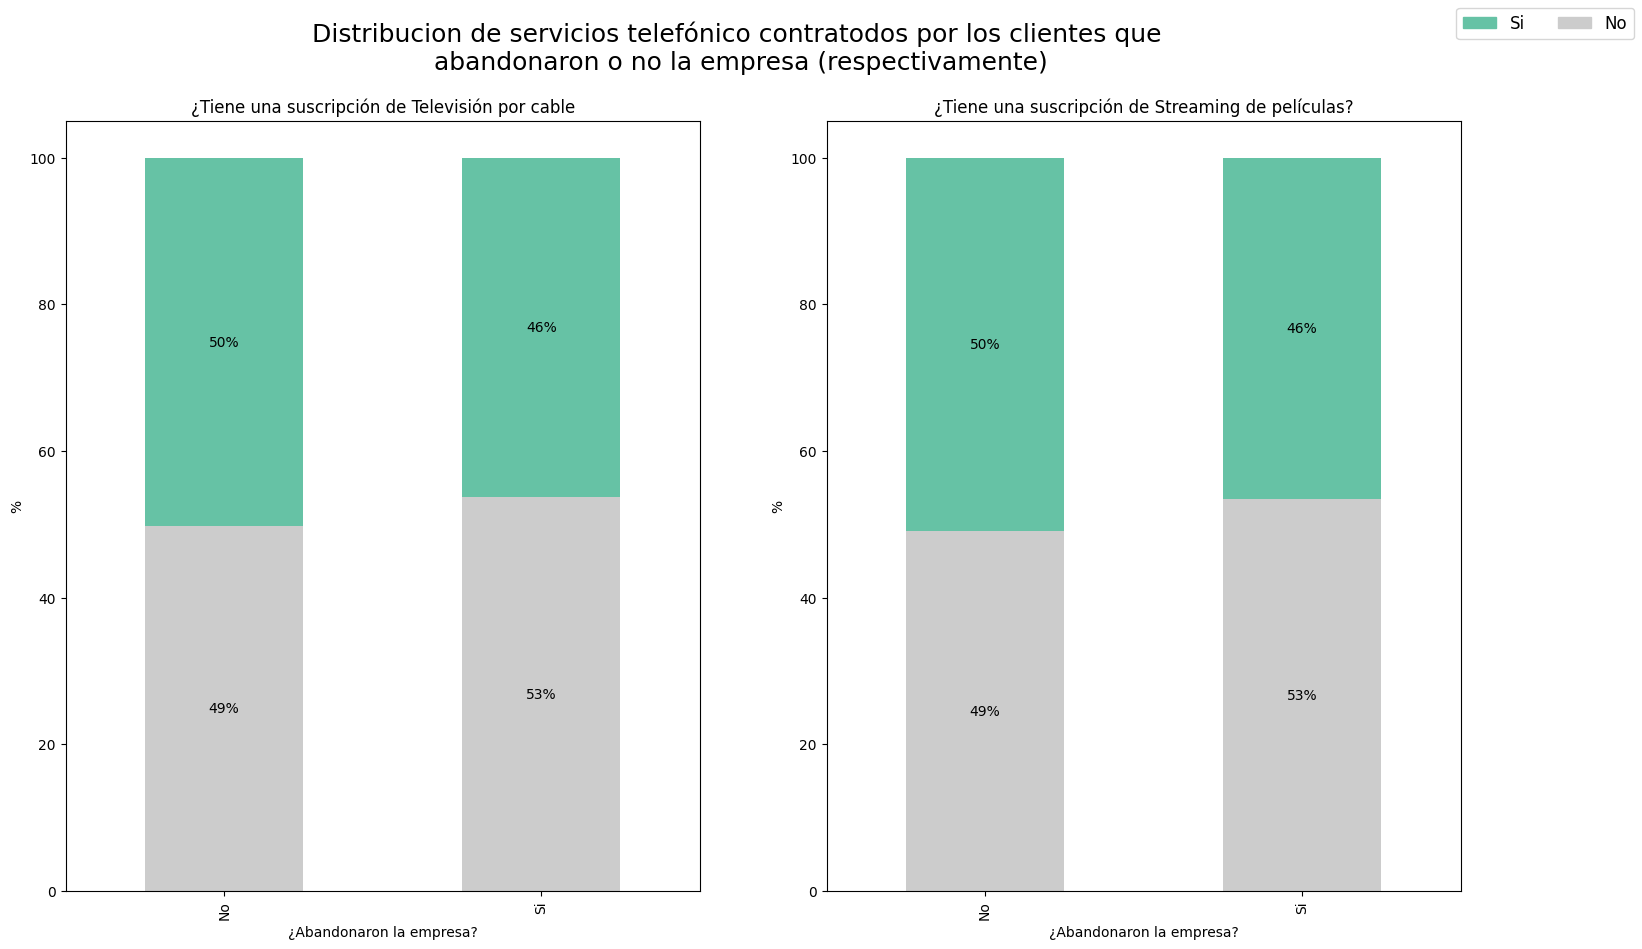

In [473]:
Streaming_TV_pct = get_stacked_percentage_internet_services('StreamingTV')
Streaming_Movies_pct = get_stacked_percentage_internet_services('StreamingMovies')


fig, axs = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribucion de servicios telefónico contratodos por los clientes que \nabandonaron o no la empresa (respectivamente)',fontsize = 18)
fig.subplots_adjust(hspace=0.5)
legend_patches = [
    mpatches.Patch(color='#66C2A5', label='Si'),
    mpatches.Patch(color='#CCCCCC', label='No')
]
fig.legend(handles= legend_patches, loc = 'upper right', ncol = 2, fontsize = 12)

Streaming_TV_pct.plot(kind='bar', stacked=True, ax=axs[0], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in Streaming_TV_pct.columns], legend = False)
axs[0].set_title('¿Tiene una suscripción de Televisión por cable')
axs[0].set_ylabel('%')
axs[0].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[0], Streaming_TV_pct)

Streaming_Movies_pct.plot(kind='bar', stacked=True, ax=axs[1], color=[color_dicts_yes_no['Categorical_Yes_No'][x] for x in Streaming_Movies_pct.columns], legend = False)
axs[1].set_title('¿Tiene una suscripción de Streaming de películas?')
axs[1].set_ylabel('%')
axs[1].set_xlabel('¿Abandonaron la empresa?', fontsize = 10)
add_labels(axs[1], Streaming_Movies_pct)